(400,)

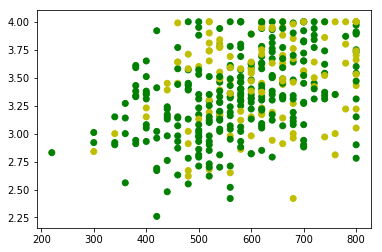

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.utils import to_categorical

student = pd.read_csv('student_data.csv')
# student.head()
x_axis = student['gre']
y_axis = student['gpa']
colors = np.where(student['admit']==1, 'y', 'g')
plt.scatter(x_axis, y_axis, c = colors)
student['gre'].shape

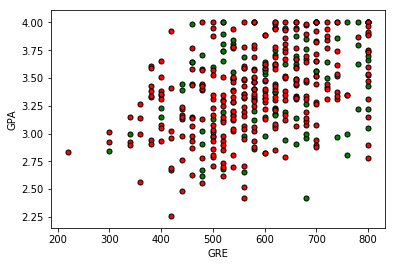

In [153]:
def plot(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data['admit'])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0,0] for s in admitted], [s[0,1] for s in admitted], s =25, color = "green", edgecolor = 'k')
    plt.scatter([s[0,0] for s in rejected], [s[0,1] for s in rejected], s =25, color = "red", edgecolor = 'k')
    plt.xlabel('GRE')
    plt.ylabel('GPA')
    
plot(student)
plt.show()

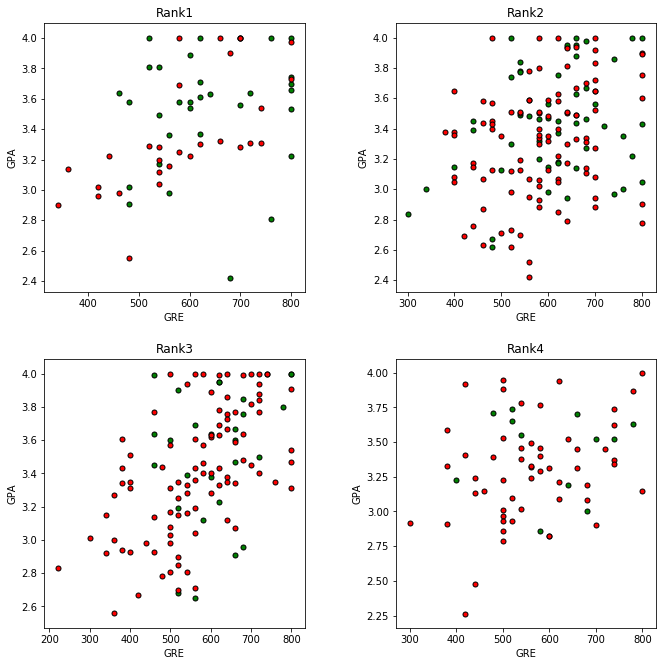

In [154]:
rank1 = student[student['rank']==1]
rank2 = student[student['rank']==2]
rank3 = student[student['rank']==3]
rank4 = student[student['rank']==4]

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.title("Rank1")
plot(rank1)

plt.subplot(222)
plt.title("Rank2")
plot(rank2)

plt.subplot(223)
plt.title("Rank3")
plot(rank3)

plt.subplot(224)
plt.title("Rank4")
plot(rank4)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
# student.drop(columns = '')

In [157]:
student['gre'] = student['gre']/800
student['gpa'] = student['gpa']/4.0
# student['rank1'] = pd.DataFrame(rank1)
# student['rank2'] = rank2
# student['rank3'] = rank3
# student['rank4'] = rank4
# rank1
student.loc[:,'rank1'] = pd.Series(rank1['rank'], index = student.index)
student.loc[:,'rank2'] = pd.Series(rank2['rank'], index = student.index)
student.loc[:,'rank3'] = pd.Series(rank3['rank'], index = student.index)
student.loc[:,'rank4'] = pd.Series(rank4['rank'], index = student.index)
student = student.drop(['rank'], axis=1)
student = student.fillna(0)
student.head()

,admit,gre,gpa,rank1,rank2,rank3,rank4
0,0,7.421875e-07,0.056406,0.0,0.0,3.0,0.0
1,1,1.289062e-06,0.057344,0.0,0.0,3.0,0.0
2,1,1.562500e-06,0.062500,1.0,0.0,0.0,0.0
3,1,1.250000e-06,0.049844,0.0,0.0,0.0,4.0
4,0,1.015625e-06,0.045781,0.0,0.0,0.0,4.0


In [158]:
X = np.array(student)[:,1:]
y = to_categorical(student['admit'])
X.shape[1]

6

In [165]:
# build model architecture

model = Sequential()

model.add(Dense(100, input_dim = 6))
model.add(Activation('sigmoid'))

model.add(Dense(30))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               700       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                3030      
_________________________________________________________________
activation_8 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 62        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 3,792
Trainable params: 3,792
Non-trainable params: 0
_________________________________________________________________


In [166]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.fit(X, y, epochs=1000, batch_size=100, verbose=0)


In [167]:
score = model.evaluate(X, y)

print('\n ACCURACY:', score[-1])

# print("\n Predictions:", model.predict_proba(X))

400/400 [==============================] - 0s 157us/step

 ACCURACY: 0.695
